In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import re

# Import LogoMaker
import sys
sys.path.append('../../')
import logomaker

%matplotlib inline
plt.ion()

In [2]:
file_name = '../data/polly/IAIIIT_matrix_ddG.csv'
matrix = pd.read_csv(file_name, index_col=False).iloc[:,1:]
matrix.head()

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,U,V,Y,X,Z
0,-0.466413,NaN,NaN,NaN,NaN,NaN,-0.603462,NaN,NaN,-0.216634,...,0.000000,NaN,-0.543360,NaN,-0.270482,NaN,NaN,-0.550548,NaN,NaN
1,-0.518936,NaN,NaN,-0.894634,-0.476292,-0.646081,-0.314229,0.000000,NaN,NaN,...,2.318028,-0.388696,-0.584893,NaN,NaN,NaN,NaN,-0.508623,NaN,NaN
2,0.000000,NaN,NaN,NaN,-0.812395,-0.378347,NaN,-0.689532,0.435996,NaN,...,0.729370,0.077148,NaN,-0.358175,NaN,NaN,-0.707129,-0.808144,NaN,NaN
3,-0.524161,NaN,NaN,NaN,-0.642867,-0.646081,NaN,0.000000,NaN,-0.825334,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.620843,-0.990144,NaN,NaN
4,-0.669081,NaN,NaN,-0.627053,-0.550998,NaN,-0.338667,0.000000,NaN,-0.498486,...,NaN,-0.608616,NaN,NaN,NaN,NaN,NaN,-0.495978,NaN,NaN


In [3]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)

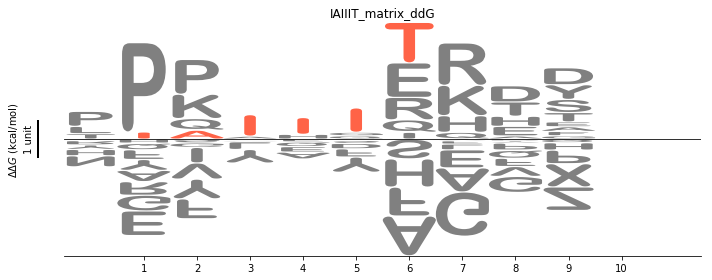

In [4]:
character_style_param_dict = {'character_colors':'gray'}
highlight_style_param_dict = {'highlight_sequence':'.IAIIIT...',   
                              'highlight_colors':'tomato'}
scalebar_param_dict = {'scalebar_x':-1}

logo = logomaker.make_logo(dataframe=matrix,
                          character_style_dict = character_style_param_dict,
                          highlight_style_dict = highlight_style_param_dict, 
                          scalebar_dict=scalebar_param_dict,
                          axes_type='scalebar',
                          vsep=.005, 
                          draw_now=False,
                          center_columns=True, 
                          )

fig, ax = plt.subplots(figsize=[10,4])
ax.set_ylabel('$\Delta \Delta G$ (kcal/mol)')
ax.set_xticks(range(1,len(matrix)+1))
ax.set_title('IAIIIT_matrix_ddG')
ax.set_xlim([-0.5,11.5])

logo.draw(ax)

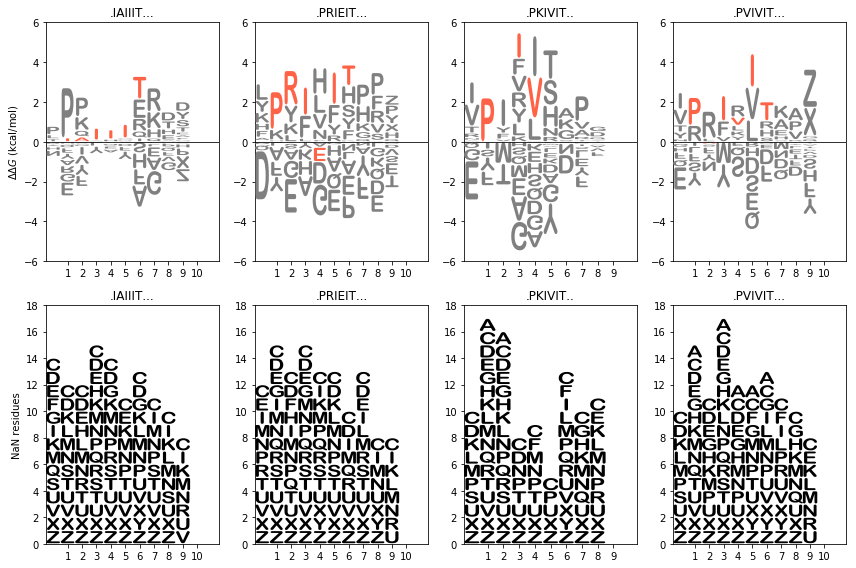

In [5]:
pairs = [
    ('IAIIIT_matrix_ddG.csv','.IAIIIT...'),
    ('PRIEIT_matrix_ddG.csv','.PRIEIT...'),
    ('PKIVIT_matrix_ddG.csv','.PKIVIT..'),
    ('PVIVIT_matrix_ddG.csv','.PVIVIT...'),]

fig, axs = plt.subplots(2,4,figsize=[12,8])

scalebar_param_dict = {'scalebar_x':-1}

for n, pair in enumerate(pairs):
    
    name = pair[0]
    wt_seq = pair[1]
    
    highlight_style_param_dict = {
                              'highlight_sequence':wt_seq,   
                              'highlight_colors':'tomato'}
    
    matrix = pd.read_csv('../data/polly/%s'%name,index_col=False).iloc[:,1:]    
    logo = logomaker.make_logo(
                        dataframe=matrix,
                        axes_type='everything',
                        vsep=.005,
                        ylim=[-6,6],
                        character_style_dict = {'character_colors':'gray'},
                        highlight_style_dict = highlight_style_param_dict, 
                        scalebar_dict=scalebar_param_dict,
                        draw_now=False,
                        center_columns=True
                        )
    if(n==0):
        axs[0,n].set_ylabel('$\Delta \Delta G$ (kcal/mol)')
    else:
        axs[0,n].set_ylabel('')
                
    axs[0,n].set_xticks(range(1,len(matrix)+1))
    axs[0,n].set_title(wt_seq)
    axs[0,n].set_xlim([-0.5,len(matrix)+1.5])
    logo.draw(axs[0,n])
    

    nan_matrix = np.isnan(matrix).astype(int)
    nan_logo = logomaker.make_logo(
                        dataframe=nan_matrix,
                        matrix_type='counts',
                        character_style_dict={'character_colors':'black'},
                        draw_now=False,
                        vsep=.005,
                        stack_order='fixed_going_down',
                        axes_type='everything',
                        ylim=[0,18],
                        )
    
    if(n==0):
        axs[1,n].set_ylabel('NaN residues')
    else:
        axs[1,n].set_ylabel('')
    
    axs[1,n].set_xticks(range(1,len(matrix)+1))
    axs[1,n].set_title(wt_seq)
    axs[1,n].set_xlim([-0.5,len(matrix)+1.5])
    nan_logo.draw(axs[1,n])


# Save plot
fig.savefig('../output/for_polly_ddG.pdf')


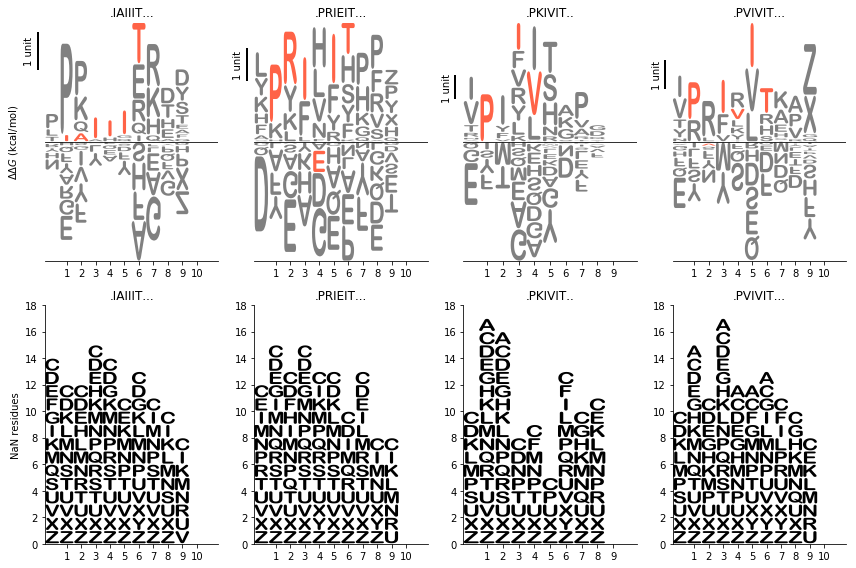

In [6]:
pairs = [
    ('IAIIIT_matrix_ddG.csv','.IAIIIT...'),
    ('PRIEIT_matrix_ddG.csv','.PRIEIT...'),
    ('PKIVIT_matrix_ddG.csv','.PKIVIT..'),
    ('PVIVIT_matrix_ddG.csv','.PVIVIT...'),]

fig, axs = plt.subplots(2,4,figsize=[12,8])

scalebar_param_dict = {'scalebar_x':-1,
                      'scalebar_text':'1 unit',
                      'scalebar_ymin':2}

for n, pair in enumerate(pairs):
    
    name = pair[0]
    wt_seq = pair[1]
    
    highlight_style_param_dict = {
                              'highlight_sequence':wt_seq,   
                              'highlight_colors':'tomato'
                               }
    
    matrix = pd.read_csv('../data/polly/%s'%name,index_col=False).iloc[:,1:]    
    logo = logomaker.make_logo( dataframe=matrix,
                                character_style_dict = {'character_colors':'gray'},
                                highlight_style_dict = highlight_style_param_dict, 
                                scalebar_dict = scalebar_param_dict,
                                axes_type='scalebar',
                                vsep=.005,
                                center_columns=True,
                                draw_now=False
                              )
    
    if(n==0):
        axs[0,n].set_ylabel('$\Delta \Delta G$ (kcal/mol)')
    else:
        axs[0,n].set_ylabel('')
    
    axs[0,n].set_xticks(range(1,len(matrix)+1))
    axs[0,n].set_title(wt_seq)
    axs[0,n].set_xlim([-0.5,len(matrix)+1.5])
    logo.draw(axs[0,n])
    
    nan_matrix = np.isnan(matrix).astype(int)
    nan_logo = logomaker.make_logo(
                        dataframe=nan_matrix,
                        matrix_type='counts',
                        character_style_dict = {'character_colors':'black'},
                        draw_now=False,
                        vsep=.005,
                        stack_order='fixed_going_down',
                        axes_type='classic',
                        ylim=[0,18]
                        )
    
    if(n==0):
        axs[1,n].set_ylabel('NaN residues')
    else:
        axs[1,n].set_ylabel('')
    
    axs[1,n].set_xticks(range(1,len(matrix)+1))
    axs[1,n].set_title(wt_seq)
    axs[1,n].set_xlim([-0.5,len(matrix)+1.5])
    nan_logo.draw(axs[1,n])
    
# Save plot
fig.savefig('../output/for_polly_ddG_alt.pdf')